### Motief & anomalies su una time series del cluster 0: Albuquerque

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matrixprofile.discords import discords
from matrixprofile import *
import matplotlib.cm as cm

**Calcolo score (definito come numero di incidenti data la settimana e la città)** 

In [2]:
df = pd.read_csv("../data/time_Series_Data.csv")
df['date'] = pd.to_datetime(df['date'])
df['year_month_week'] = df['date'].dt.to_period('W').dt.strftime('%Y-%m-%W')

weekly_data = df.groupby(['year_month_week', 'city']).size().reset_index(name='incident_count')
weekly_data.dropna(inplace=True)
weekly_data.head()

,year_month_week,city,incident_count
0,2014-01-00,Albany,1
1,2014-01-00,Albuquerque,1
2,2014-01-00,Allentown,1
3,2014-01-00,Altoona,1
4,2014-01-00,Amarillo,1


**Vengono prese in considerazione solo le città che presentano un numero di settimane con incidenti che supera il 15% del totale delle settimane nell’arco dei 4 anni.**

In [3]:
selected_city = weekly_data.groupby(['city']).count()
selected_city = selected_city[selected_city.year_month_week >= 32].reset_index()['city']
df = weekly_data[weekly_data.city.isin(selected_city)]

df = df.pivot(index="city", columns="year_month_week", values="incident_count")
df.fillna(0, inplace=True)

In [4]:
Albuquerque = df.loc['Albuquerque']

window_size = 8 
max_motifs = 12

**Matrix Profile**

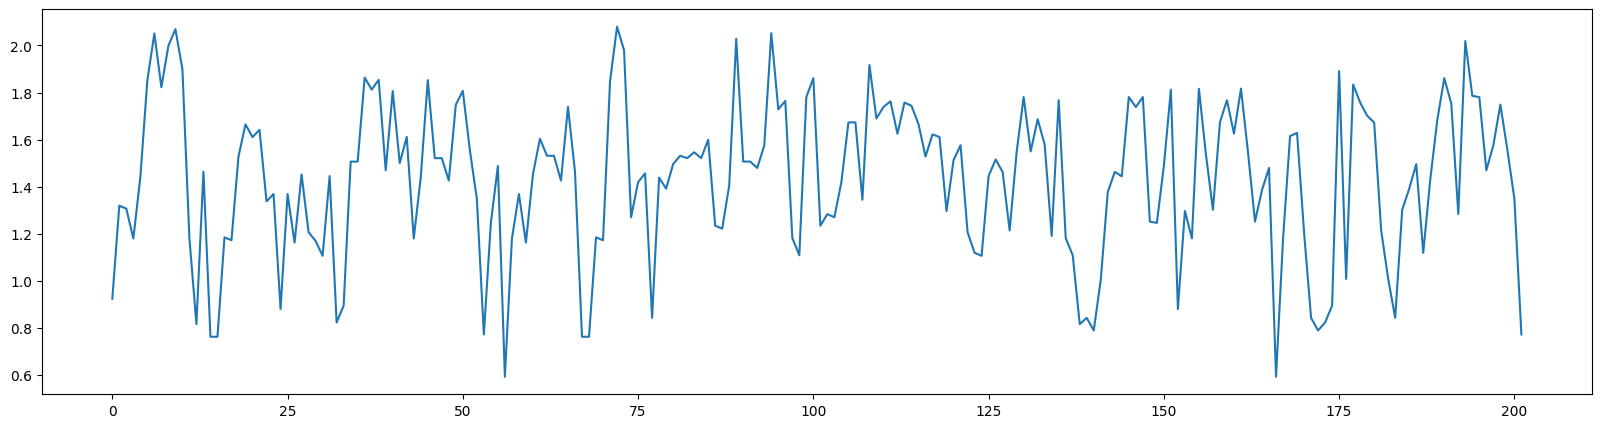

In [5]:
mp, mpi = matrixProfile.stomp(Albuquerque.values, window_size)
plt.figure(figsize=(20, 5))
plt.plot(mp)
plt.show()

**Motif**

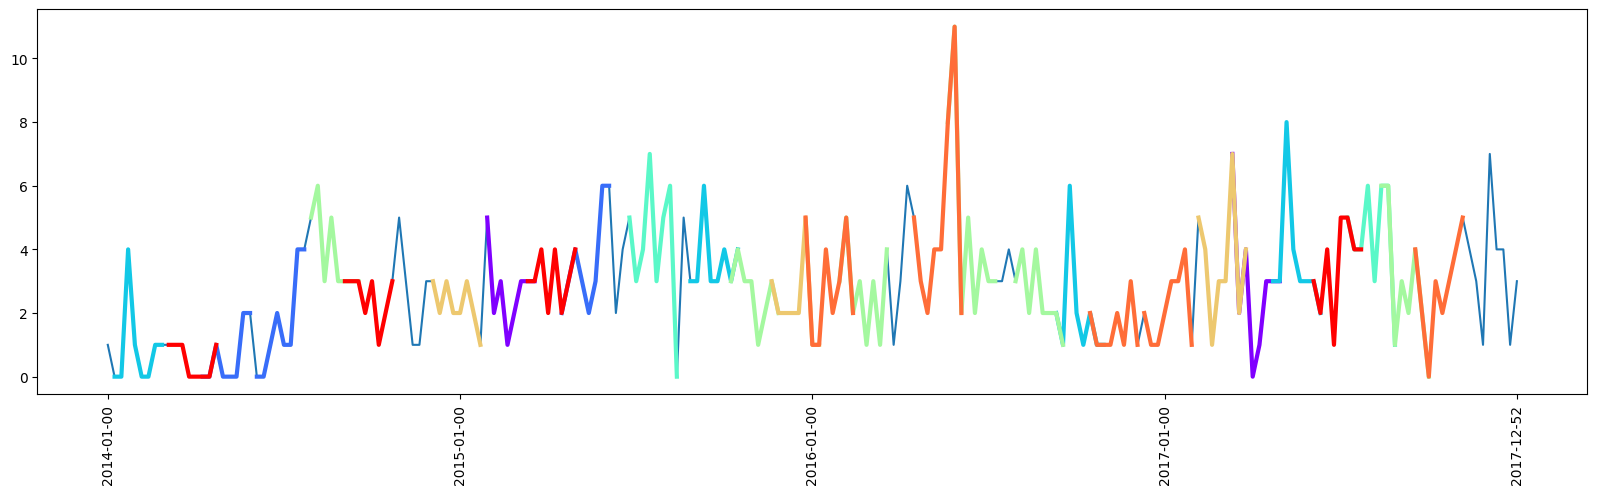

In [6]:
# Get motifs
mo, mod = motifs.motifs(Albuquerque.values, (mp, mpi), max_motifs=max_motifs)

# Plotting
plt.figure(figsize=(20, 5))
plt.plot(Albuquerque)
plt.xticks(range(0, len(Albuquerque), 52), Albuquerque.index[::52], rotation=90)

colors = cm.rainbow(np.linspace(0, 1, len(mo)))

for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = Albuquerque.values[i:i+window_size]
        plt.plot(range(i, i+window_size), m_shape, color=c, lw=3)

plt.show()


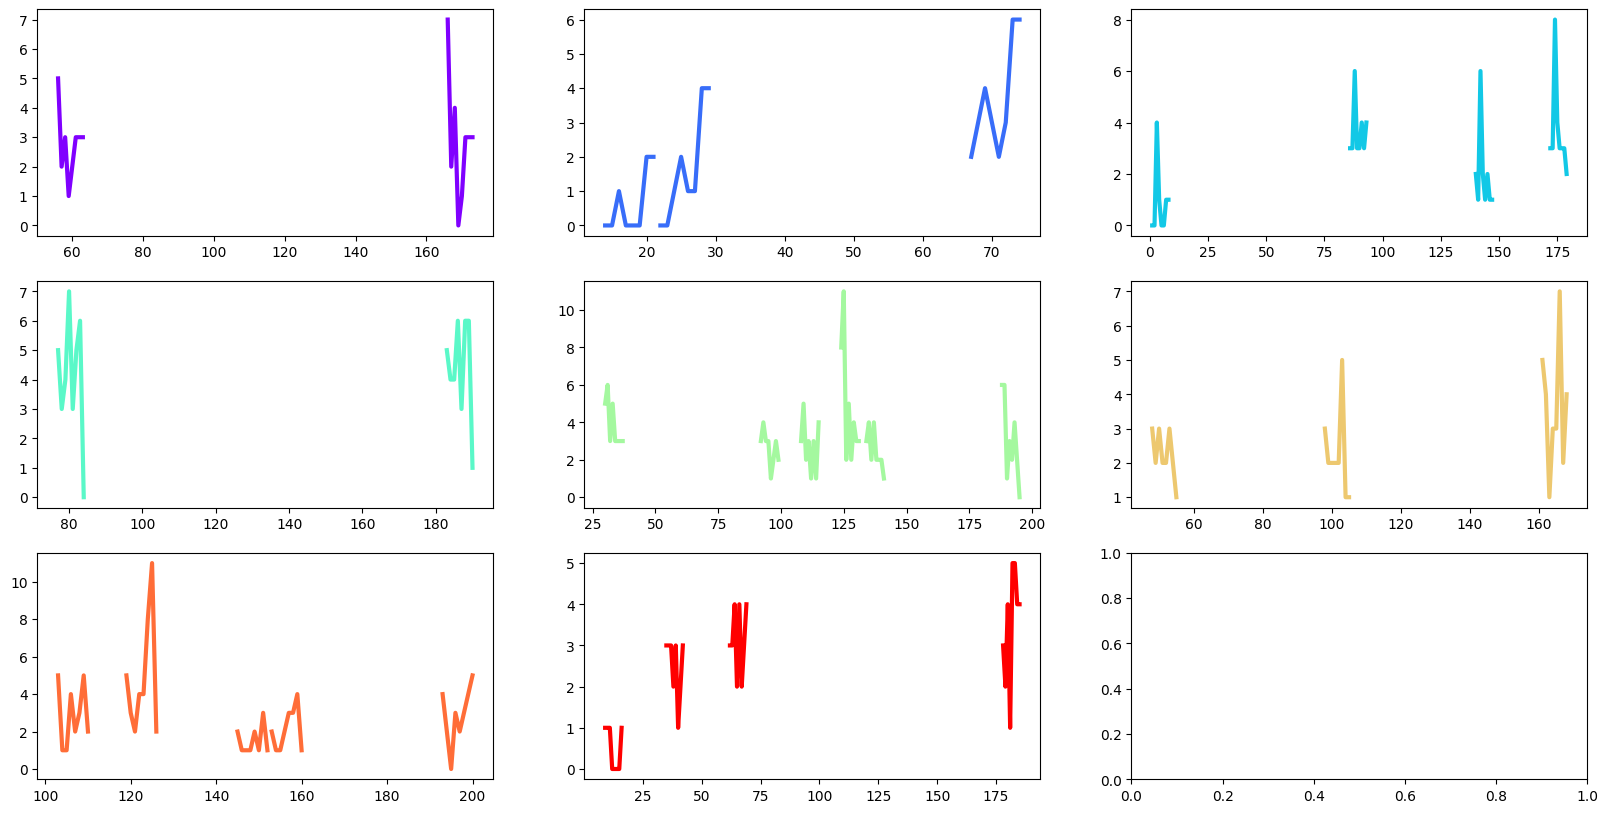

In [7]:
# Calcola il numero di righe e colonne per la griglia di trame
n = len(mo)
cols = int(np.ceil(np.sqrt(n)))
rows = int(np.ceil(n / cols))

fig, axs = plt.subplots(rows, cols, figsize=(20, 10))
axs = axs.ravel()
for idx, (m, d, c) in enumerate(zip(mo, mod, colors)):
    for i in m:
        m_shape = Albuquerque.values[i:i+window_size]
        axs[idx].plot(range(i,i+window_size), m_shape, color=c, lw=3)

plt.show()

**Anomalies detection**

In [8]:
anoms = discords(mp, ex_zone=3, k=5)

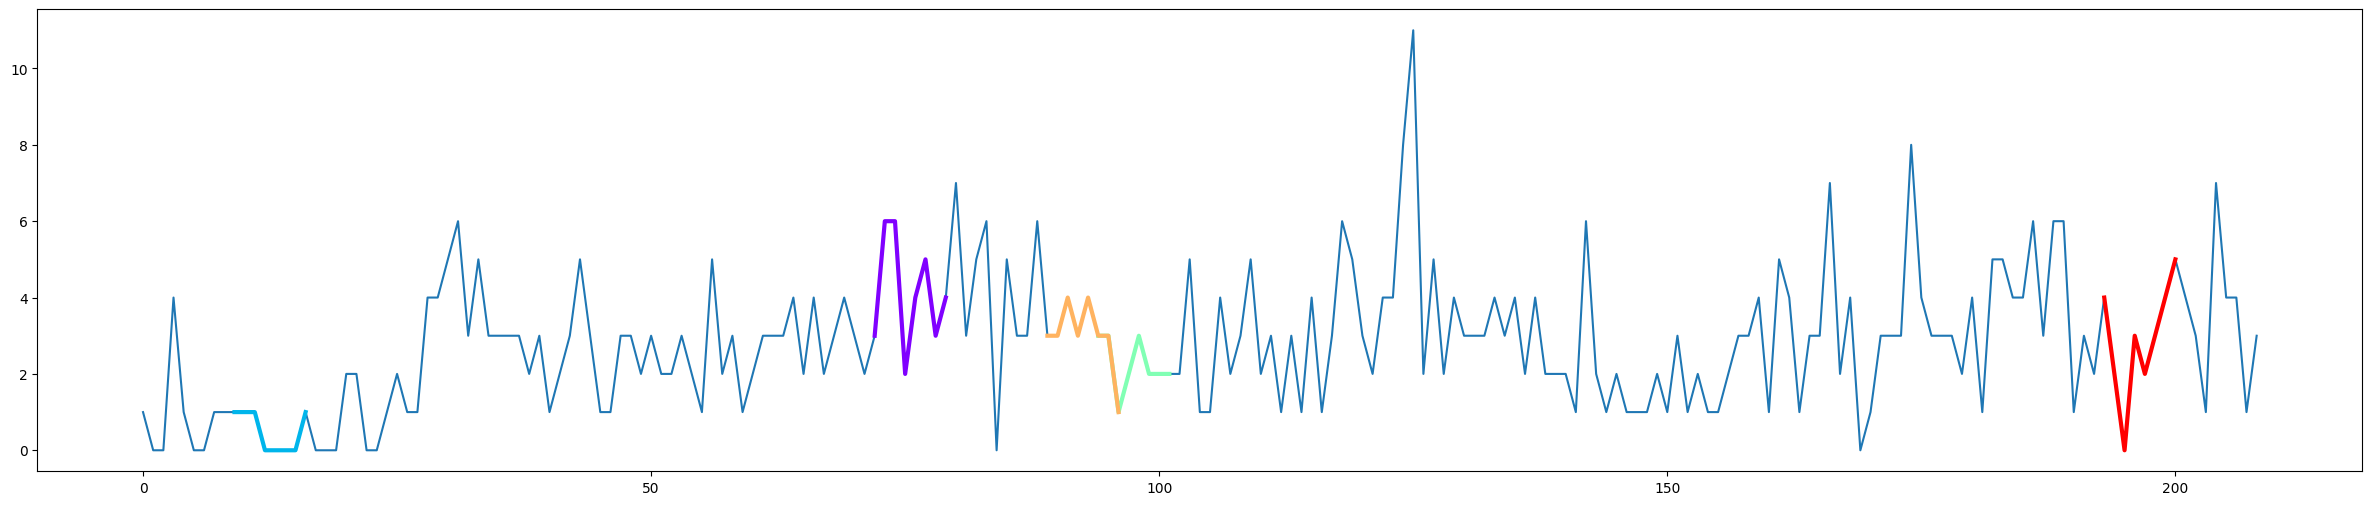

In [9]:
plt.figure(figsize=(30, 6))
plt.plot(Albuquerque.values)

colors = cm.rainbow(np.linspace(0, 1, len(anoms)))
for a, c in zip(anoms, colors):
    a_shape = Albuquerque.values[a:a+window_size]
    plt.plot(range(a, a+window_size), a_shape, color=c, lw=3)

plt.show()
